<h2 style='text-align:center;font-size:40px;background-color:CRIMSON;border:20px;color:white'>BIG MART SALES DATA PREDICTION<h2>


<CENTER><IMG SRC="https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/final-grocery--cover-thumbnail-1200x1200.png"></CENTER>

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>CONTENTS<h2>

1. Import Relevant Libraries
2. Data Inspection
3. Data Cleaning
4. Exploratory Data Analysis

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>PROBLEM STATEMENT<h2>

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>DATA<h2>



* Item_Identifier : Unique product ID

* Item_Weight : Weight of product

* Item_Fat_Content : Whether the product is low fat or not

* Item_Visibility : The % of total display area of all products in a store allocated to the particular product

* Item_Type : The category to which the product belongs

* Item_MRP : Maximum Retail Price (list price) of the product

* Outlet_Identifier : Unique store ID

* Outlet_Establishment_Year : The year in which store was established

* Outlet_Size : The size of the store in terms of ground area covered

* Outlet_Location_Type : The type of city in which the store is located

* Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales : Sales of the product in the particular store.


<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 1: Importing the Relevant Libraries <h2>

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
train = pd.read_csv("../input/bigmart-sales-data/Train.csv")
test = pd.read_csv("../input/bigmart-sales-data/Test.csv")

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 2. Data Inspection<h2>

In [ ]:
train.shape,test.shape

### As said above we have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.

In [ ]:
test.apply(lambda x: sum(x.isnull()))

In [ ]:
test.isnull().sum()/test.shape[0] *100

### We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.

In [ ]:
train.apply(lambda x: sum(x.isnull()))

In [ ]:
train.isnull().sum()/train.shape[0] *100

### We have same missing values percentage of Item Size and Outlet Size columns as that of in Test set.

In [ ]:
train.info()

In [ ]:
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

In [ ]:
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

In [ ]:
train.describe()

In [ ]:
test.describe()

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 3. Data Cleaning <h2>

### Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

### 1) Item Size

In [ ]:
train.columns

In [ ]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

### The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"

In [ ]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [ ]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

### We have succesfully imputed the missing values from the column Item_Weight.

## 2) Outlet Size

In [ ]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

In [ ]:
print(train['Outlet_Size'].value_counts())
print('******************************************')
print(test['Outlet_Size'].value_counts())

### Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.

In [ ]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [ ]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

### We have succesfully imputed the missing values from the column Outlet_Size.


<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 4. Exploratory Data Analysis <h2>

In [ ]:
train.columns

In [ ]:
train.head()

In [ ]:
train['Item_Fat_Content'].value_counts()

### We see there are some irregularities in the column and it is needed to fix them!

In [ ]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [ ]:
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)

In [ ]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2020 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2020 - x)

In [ ]:
train.head()

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 4.A. Univariate Analysis <h2>

### 1) Item Fat Content

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

## Observations:

* The Items bought are more of Low Fat.

### 2) Item Type

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train,palette='spring')

## **Observations**:
    
* Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
* Snack Foods too have good sales.

### 3) Outlet Size

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train,palette='summer')

## Observations:

* The Outlets are more of Medium Size

### 4) Outlet Location Type

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='autumn')

## **Observations**:

* The Outlets are maximum in number in Tier 3 Cities.

### 5) Outlet Type

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,palette='twilight')

## Observations:
    
* The Outlets are more of Supermarket Type1.

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Years_Established',data=train,palette='mako')

## **Observations**:

* The Outlets are more of established and running from 35 years.

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 4.B Bivariate Analysis <h2>

In [ ]:
train.columns

### 1) Item Fat Content

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train,palette='mako')

## Observations:

* The Item Outles sales are high for both Low Fat and Regular Item types.

### 2) Item Visibility

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=train)

## Observations:

* Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

### Lets consider it like missing information and impute it with mean visibility of that product.

In [ ]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=train)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

### We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.

### 3) Item Type

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')

## Observations:

* The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

## **Observations**:

* Items MRP ranging from 200-250 dollars is having high Sales.

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,palette='winter')

## Observations:

* The Outlet Sales is maximum for Medium and High sized Outlets.
* The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,palette='plasma')

## Observations:

* The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets. 

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train,palette='viridis')

## Observations:

* It is quiet evident that Outlets established 35 years before is having good Sales margin.
* We also have a outlet which was established before 22 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 4.C Multivariate Analysis<h2>

In [ ]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.legend()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()

## **Observations**:

* The Tier-3 location type has all types of Outlet type and has high sales margin.

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 5. Feature Engineering<h2>

In [ ]:
train.head()

In [ ]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [ ]:
train.head()

### There are some columns that needs to be dropped as they don't seem helping our analysis.

In [ ]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [ ]:
train.columns

In [ ]:
X= train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']]
y= train['Item_Outlet_Sales']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 6. Feature Scaling </h2

In [ ]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 7. Building Model<h2>

### 1) Linear regression

In [ ]:
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
coef2 = pd.Series(LR.coef_,features).sort_values()

In [ ]:
coef2

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Step 8. Evaluation Metrics<h2>

### a) R-Squared: 
R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* If the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

### b) MAE and MSE:

* **MAE** : The mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.
* **MSE** : The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

In [ ]:
MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)

In [ ]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

### c) RMSE:

RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [ ]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

### 2) Random Forest Regressor

In [ ]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(X_train,y_train)

# Making Predictions
y_pred = RF.predict(X_test)

In [ ]:
coef3 = pd.Series(RF.feature_importances_, features).sort_values(ascending=False)
coef3

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(RF.feature_importances_,features)

In [ ]:
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [ ]:
cross_val(LR,LinearRegression(),X,y,5)

In [ ]:
cross_val(RF,RandomForestRegressor(),X,y,5)

In [ ]:
import xgboost as xgb
my_model = xgb.XGBRegressor(tree_method='gpu_hist')
my_model.fit(X_train, y_train)


In [ ]:
coef4 = pd.Series(my_model.feature_importances_, features).sort_values(ascending=False)
coef4

In [ ]:
y_pred = my_model.predict(X_test)
MAEX= metrics.mean_absolute_error(y_test,y_pred)
MSEX= metrics.mean_squared_error(y_test,y_pred)

In [ ]:
print("mean absolute error:",MAEX)
print("mean squared error:",MSEX)
from math import sqrt
rmse = sqrt(MSEX)
print("Root Mean Squared Error:",rmse)

In [ ]:
cross_val(xgb,my_model,X,y,5)

## Random forest Model clearly did best!

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Conclusions <h2>

* Item_MRP clearly maximises the Outlet sales.
* Outlet Type being SuperMarket or Grocery Store also depicts the Outlet Sales.
* Years Established will also tend to have loyal customers and that's how the sales margin can be acheived.

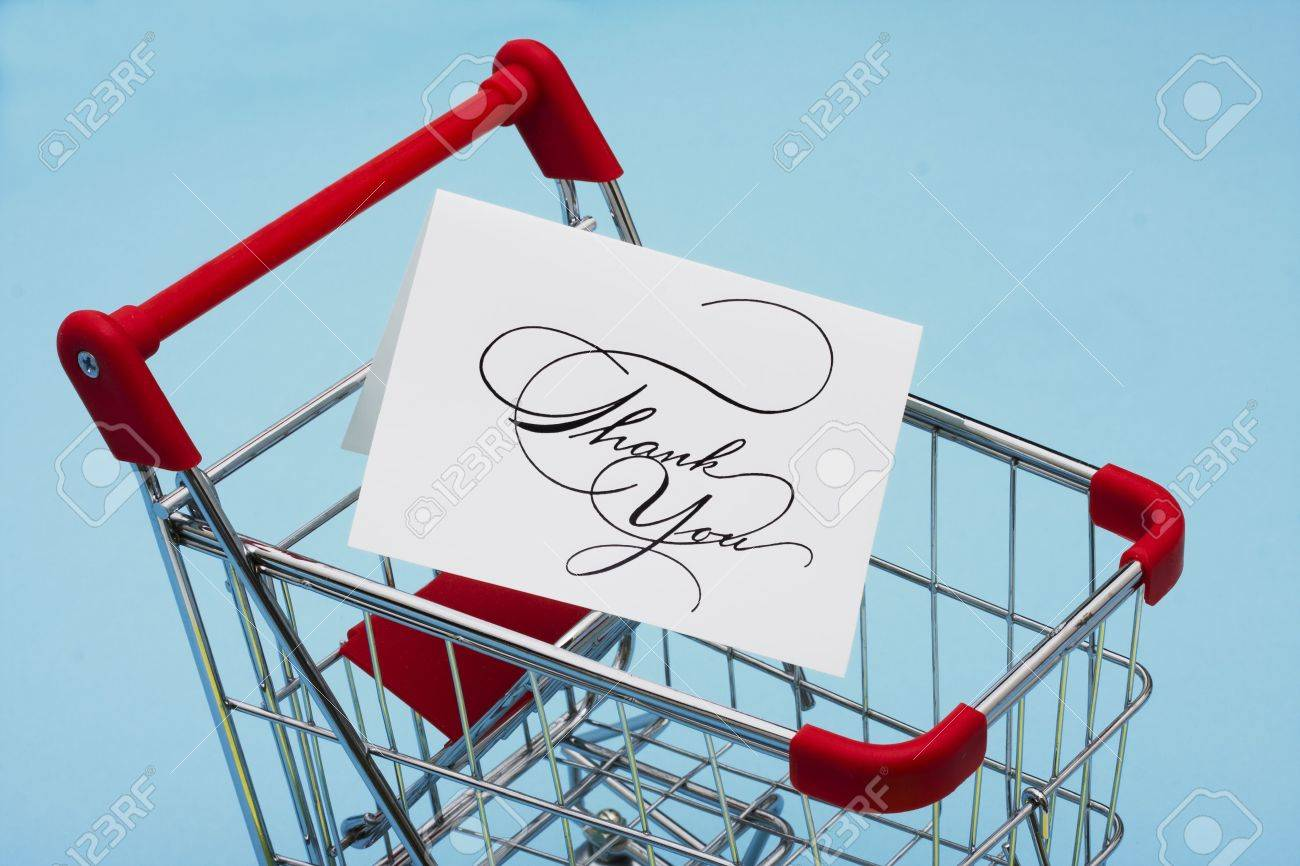